In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats
import random
import statsmodels.api as sm

In [3]:
df = pd.read_excel(r"C:\Users\adity\Desktop\PROJECT\poission fitting\exam data.xlsx") #""", index_col = 'truck arrival"""
df

,truck arrival,Frequency
0,0,52
1,1,151
2,2,130
3,3,102
4,4,45
5,5,12
6,6,5
7,7,1
8,8,2


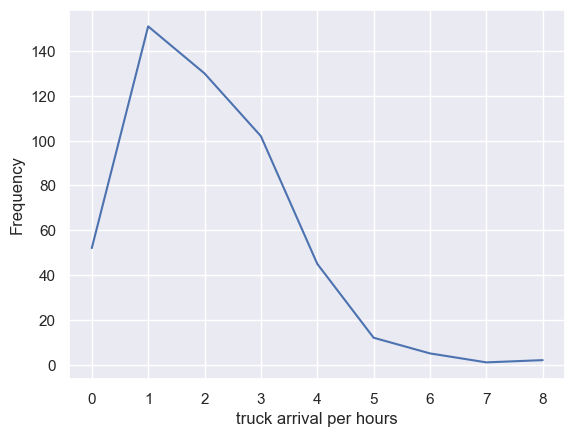

In [28]:
sns.set()
y = df['Frequency']
x = df['truck arrival']
_ = sns.lineplot(x=x, y=y)
_ = plt.ylabel("Frequency")
_ = plt.xlabel("truck arrival per hours")
plt.show()

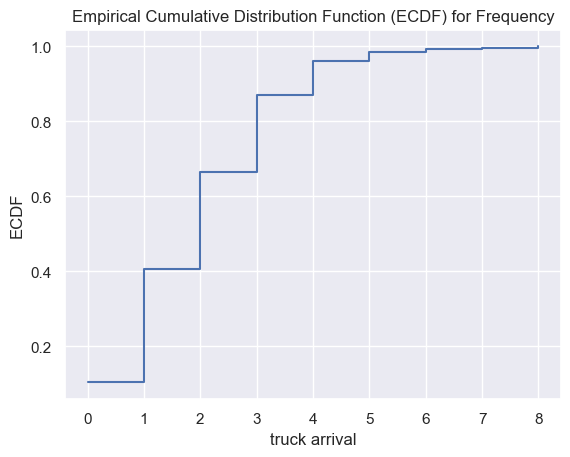

In [93]:
x = df['truck arrival']
frequency_counts = df['Frequency']

# Calculate the empirical cumulative distribution function (ECDF)
ecdf = np.cumsum(frequency_counts) / np.sum(frequency_counts)

# Plot the ECDF
plt.step(frequency_counts.index, ecdf, where='post')
plt.xlabel('truck arrival')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function (ECDF) for Frequency')
plt.show()

In [12]:
df['xf'] = df['truck arrival'] * df['Frequency']
df.head()
a = np.array(df['xf']).sum()
b = np.array(df['Frequency']).sum()
lamda = a/b
print(lamda)

2.02


In [14]:
Po = math.exp(-lamda)
formatted_Po = "{:.8f}".format(Po)

print("Po: {}".format(formatted_Po))

Po: 0.13265547


In [19]:
def pmf(lamda ,k):
    if k == 0:
        return Po
    else:
        return (Po*(lamda**k))/(math.factorial(k))

df['Probability'] = [pmf(lamda, k) for k in df['truck arrival']]
df['Expected Frequency'] = df['Probability']*b
df.head()
print(np.sum(df['Frequency']))
df.head()

500


,truck arrival,Frequency,xf,Probability,Expected Frequency
0,0,52,0,0.132655,66.327733
1,1,151,151,0.267964,133.982020
2,2,130,260,0.270644,135.321840
3,3,102,306,0.182233,91.116706
4,4,45,180,0.092028,46.013936


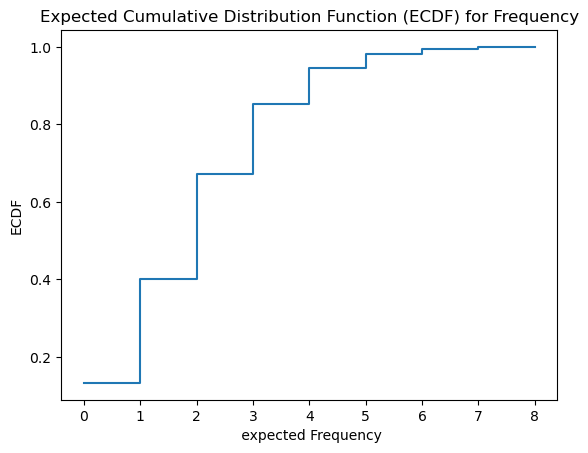

In [20]:
x = df['truck arrival']
frequency_counts = df['Expected Frequency']

# Calculate the empirical cumulative distribution function (ECDF)
ecdf = np.cumsum(frequency_counts) / np.sum(frequency_counts)

# Plot the ECDF
plt.step(frequency_counts.index, ecdf, where='post')
plt.xlabel(' expected Frequency')
plt.ylabel('ECDF')
plt.title('Expected Cumulative Distribution Function (ECDF) for Frequency')
plt.show()

In [22]:
df.head()

,truck arrival,Frequency,xf,Probability,Expected Frequency
0,0,52,0,0.132655,66.327733
1,1,151,151,0.267964,133.982020
2,2,130,260,0.270644,135.321840
3,3,102,306,0.182233,91.116706
4,4,45,180,0.092028,46.013936


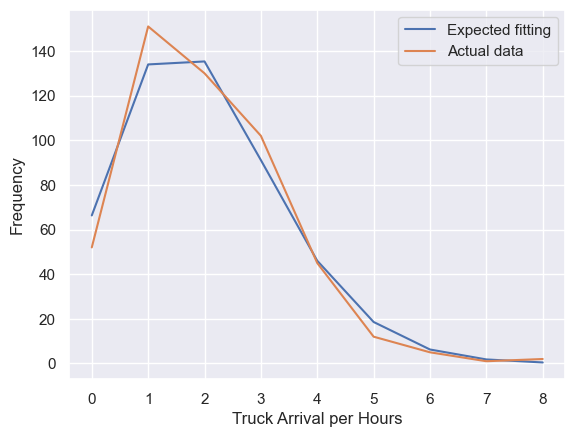

In [29]:
sns.set()

y_1 = df['Expected Frequency']
y_2 = df['Frequency']
x = df['truck arrival']

# Plotting the lines
sns.lineplot(x=x, y=y_1, label='Expected fitting')
sns.lineplot(x=x, y=y_2, label='Actual data')

# Adding labels and legend
plt.ylabel("Frequency")
plt.xlabel("Truck Arrival per Hours")
plt.legend()

# Display the plot
plt.show()


# This show that our fitted curve is good fit ........

thank you!

In [ ]:
# we can verify te same by goodness of fit........